In [2]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt 

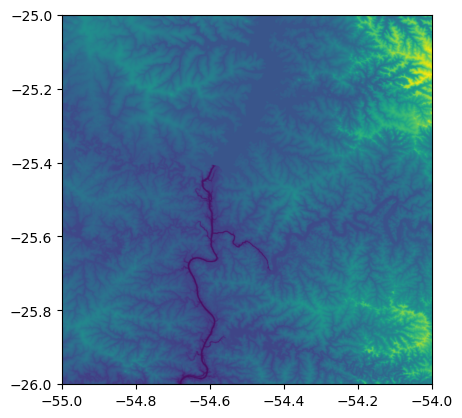

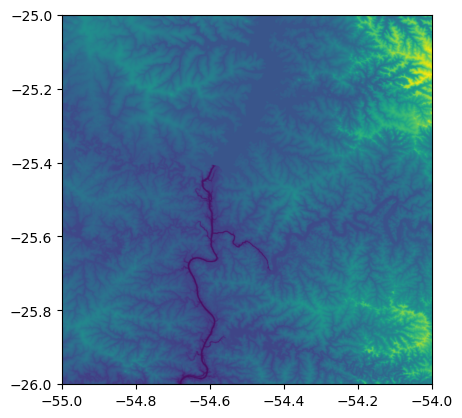

<Axes: >

In [29]:
img = rasterio.open('../mapas/s26_w055_1arc_v3.tif')
img2 = rasterio.open('../mapas/s26_w055_1arc_v3_2.tif')
show(img)
show(img2)
# X and Y are supposed to be latitude and longitude if you have the right metadata

In [9]:
# Na saída da img.read, o primeiro critério do shape=('1') representa as bands do arquivo, como esse arquivo só tem uma imagem, só tem um band
full_img = img.read()  
full_img 

array([[[257, 256, 255, ..., 416, 417, 419],
        [257, 256, 255, ..., 414, 414, 412],
        [256, 256, 255, ..., 412, 408, 406],
        ...,
        [197, 196, 196, ..., 336, 340, 342],
        [198, 197, 197, ..., 339, 342, 342],
        [198, 197, 197, ..., 339, 341, 343]]],
      shape=(1, 3601, 3601), dtype=int16)

In [10]:
# To find out number of bands in an image
num_bands = img.count
print('Number of bands in the image = ',num_bands)

Number of bands in the image =  1


In [12]:
# Quando tiver, é possível atribuir cada band a uma variavel
img_band1 = img.read(1) # 1 stands for 1st band.
# img_band2 = img.read(2)
# img_band3 = img.read(3)
img_band1

array([[257, 256, 255, ..., 416, 417, 419],
       [257, 256, 255, ..., 414, 414, 412],
       [256, 256, 255, ..., 412, 408, 406],
       ...,
       [197, 196, 196, ..., 336, 340, 342],
       [198, 197, 197, ..., 339, 342, 342],
       [198, 197, 197, ..., 339, 341, 343]],
      shape=(3601, 3601), dtype=int16)

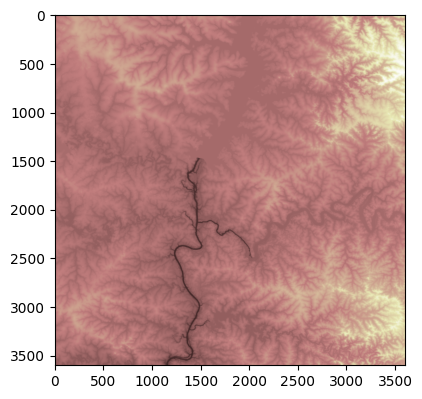

In [13]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_band1, cmap='pink')
# ax2 = fig.add_subplot(2,2,2)
# ax2.imshow(img_band2, cmap='pink')
# ax3 = fig.add_subplot(2,2,3)
# ax3.imshow(img_band3, cmap='pink')

In [14]:
#To find out the coordinate reference system
print('Coordinate reference system: ', img.crs)

Coordinate reference system:  EPSG:4326


In [15]:
#Read metadata
metadata = img.meta
print('Metadata: {metadata}\n'.format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32767.0, 'width': 3601, 'height': 3601, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0002777777777777778, 0.0, -55.00013888888889,
       0.0, -0.0002777777777777778, -24.99986111111111)}



In [16]:
#Read description, if any
desc = img.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: (None,)



In [17]:
#To find out geo transform 
print('Geotransform: ',img.transform)

Geotransform:  | 0.00, 0.00,-55.00|
| 0.00,-0.00,-25.00|
| 0.00, 0.00, 1.00|


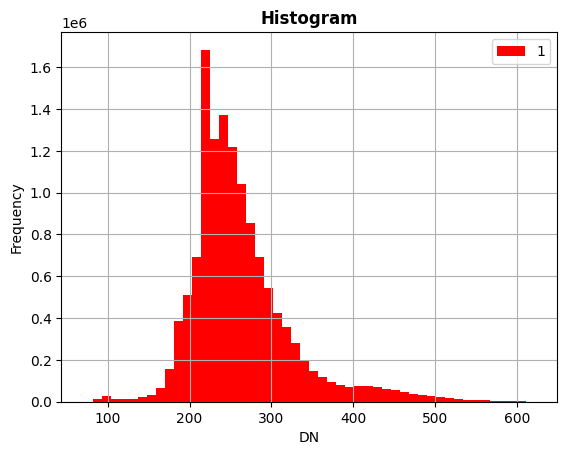

In [18]:
##Plot pixel value histogram in each band.
rasterio.plot.show_hist(full_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False)
#Peak at 255 is pixels with no data, outside region of interest.

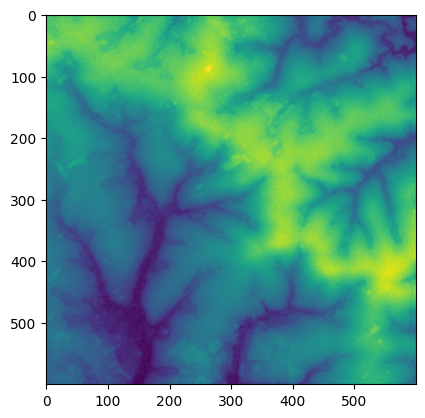

In [24]:
clipped_img = full_img[:, 300:900, 300:900]
plt.imshow(clipped_img[0,:,:])

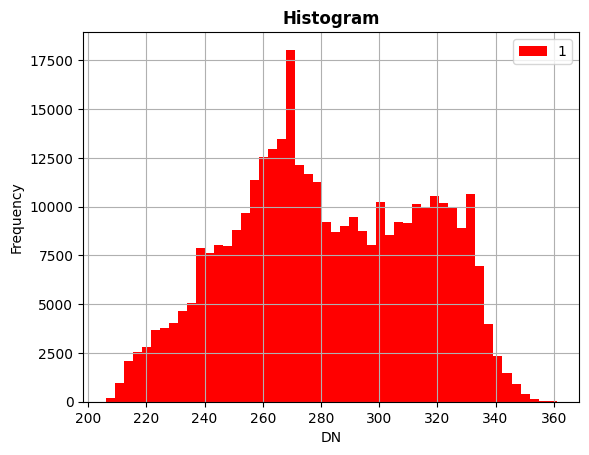

In [20]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled',lw=0.0,stacked=False)
#Each band showing slightly different information

In [27]:
################### NDVI - normalized difference vegetation index ###########################
# NDVI = (NIR-Red) / (NIR+Red)

#Let us assume 2 is red and 3 is NIR
red_clipped = clipped_img[0].astype('f4')
red_clipped
# nir_clipped = clipped_img[1].astype('f4')  
# ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped) ##Isso basicamente seria a conta do ndvi, mas como meu tiff só tem uma band, não tem como fazer

#Return Runtime warning about dividing by zero as we have some pixels with value
#So let us use numpy to do this math and replace inf / nan with some value.

array([[315., 313., 312., ..., 225., 221., 224.],
       [314., 314., 313., ..., 222., 220., 221.],
       [314., 314., 314., ..., 222., 222., 222.],
       ...,
       [253., 255., 255., ..., 263., 263., 264.],
       [255., 255., 255., ..., 266., 266., 265.],
       [257., 256., 256., ..., 267., 268., 267.]],
      shape=(600, 600), dtype=float32)

In [ ]:
# import numpy as np
# ndvi_clipped2 = np.divide(np.subtract(nir_clipped, red_clipped), np.add(nir_clipped, red_clipped))
# ndvi_clipped3 = np.nan_to_num(ndvi_clipped2, nan=-1)
# plt.imshow(ndvi_clipped3, cmap='viridis')
# plt.colorbar()
# #Some times each band is available as seperate images
# #Data from here: https://landsatonaws.com/L8/042/034/LC08_L1TP_042034_20180619_20180703_01_T1
# #Band 4 = Red, Band 5: NIR

# red = rasterio.open('images/landsat/red_band.tif')
# #Extract image as a smaller size... 
# red_img = red.read(1, out_shape=(1, int(red.height // 2), int(red.width // 2)))
# plt.imshow(red_img, cmap='viridis')
# plt.colorbar()
# #Extract smaller region, otherwise when we do NDVI math we divide by 0 where there is no data
# red_img = red_img[1000:3000, 1000:3000]
# plt.imshow(red_img, cmap='viridis')
# plt.colorbar()

# nir = rasterio.open('images/landsat/NIR_band.tif')
# nir_img = nir.read(1, out_shape=(1, int(nir.height // 2), int(nir.width // 2)))
# nir_img = nir_img[1000:3000, 1000:3000]

# plt.imshow(nir_img, cmap='viridis')
# plt.colorbar()

# #Convert int to float as we will be doing math
# red_img_float = red_img.astype('f4') #Float 32
# nir_img_float = nir_img.astype('f4')

# ndvi = (nir_img_float - red_img_float) / (nir_img_float + red_img_float)
# plt.imshow(ndvi, cmap='viridis')
# plt.colorbar()